In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("BTC-USD.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2735,2022-03-14,37846.316406,39742.500000,37680.734375,39666.753906,39666.753906,24322159070
2736,2022-03-15,39664.250000,39794.628906,38310.210938,39338.785156,39338.785156,23934000868
2737,2022-03-16,39335.570313,41465.453125,39022.347656,41143.929688,41143.929688,39616916192
2738,2022-03-17,41140.843750,41287.535156,40662.871094,40951.378906,40951.378906,22009601093


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2735,2022-03-14,37846.316406,39742.500000,37680.734375,39666.753906,39666.753906,24322159070
2736,2022-03-15,39664.250000,39794.628906,38310.210938,39338.785156,39338.785156,23934000868
2737,2022-03-16,39335.570313,41465.453125,39022.347656,41143.929688,41143.929688,39616916192
2738,2022-03-17,41140.843750,41287.535156,40662.871094,40951.378906,40951.378906,22009601093
2739,2022-03-18,40912.628906,42195.746094,40319.796875,41702.593750,41702.593750,33465370624


In [7]:
df1=df.reset_index()['Close']
df1

0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
2735    39666.753906
2736    39338.785156
2737    41143.929688
2738    40951.378906
2739    41702.593750
Name: Close, Length: 2740, dtype: float64

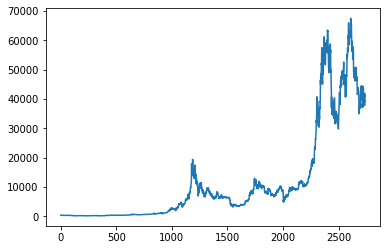

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
import numpy as np

In [10]:
df1

0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
2735    39666.753906
2736    39338.785156
2737    41143.929688
2738    40951.378906
2739    41702.593750
Name: Close, Length: 2740, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.00414359]
 [0.00365546]
 [0.00321557]
 ...
 [0.60790327]
 [0.60504596]
 [0.61619345]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(1781, 959)

In [15]:
train_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.14702051],
       [0.15168065],
       [0.1534392 ]])

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(1680, 100)
(1680,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(858, 100)
(858,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
27/27 [==============================] - 14s 101ms/step - loss: 0.0013 - val_loss: 0.0087
Epoch 2/100
27/27 [==============================] - 1s 38ms/step - loss: 2.0286e-04 - val_loss: 0.0093
Epoch 3/100
27/27 [==============================] - 1s 39ms/step - loss: 1.5598e-04 - val_loss: 0.0055
Epoch 4/100
27/27 [==============================] - 1s 36ms/step - loss: 1.4238e-04 - val_loss: 0.0091
Epoch 5/100
27/27 [==============================] - 1s 38ms/step - loss: 1.2428e-04 - val_loss: 0.0127
Epoch 6/100
27/27 [==============================] - 1s 37ms/step - loss: 1.1506e-04 - val_loss: 0.0096
Epoch 7/100
27/27 [==============================] - 1s 36ms/step - loss: 1.1106e-04 - val_loss: 0.0177
Epoch 8/100
27/27 [==============================] - 1s 36ms/step - loss: 9.9071e-05 - val_loss: 0.0185
Epoch 9/100
27/27 [==============================] - 1s 36ms/step - loss: 9.4356e-05 - val_loss: 0.0300
Epoch 10/100
27/27 [==============================] - 1s 36ms/step

In [25]:
import tensorflow as tf

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

5166.782013706704

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

31861.68251294876

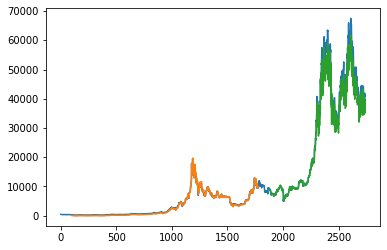

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [40]:
len(test_data)
x_input=test_data[859:].reshape(1,-1)
x_input.shape


(1, 100)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [42]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5775125]
101
1 day input [0.69841359 0.72986104 0.74078019 0.69090753 0.68905488 0.72294912
 0.70467757 0.68296353 0.69255909 0.69045545 0.69302653 0.72354107
 0.71896907 0.75096295 0.75152175 0.74569976 0.75133359 0.7488243
 0.70354132 0.68656304 0.69744637 0.68451128 0.70499493 0.69992592
 0.68676198 0.67844393 0.64388962 0.6378341  0.61404633 0.61665862
 0.61929497 0.61795439 0.6315263  0.64953    0.62938522 0.63692548
 0.63807848 0.6371359  0.62432473 0.62618086 0.61681275 0.6010251
 0.53835732 0.51718068 0.53567866 0.54128083 0.5457278  0.54421594
 0.54846165 0.55804927 0.56330012 0.5600269  0.56841886 0.57227927
 0.54571267 0.54870453 0.61320009 0.61231402 0.62672696 0.64791524
 0.65204294 0.6553128  0.64383189 0.62666024 0.62423448 0.62353773
 0.62931618 0.65882089 0.64971932 0.59891189 0.59138785 0.5927409
 0.56765098 0.54752747 0.56549407 0.55081124 0.56618531 0.57926776
 0.57764923 0.55694305 0.63831348 0.65554785 0.64915925 0.62731096
 0.57813087 0.58203331 0.56748189 0.5

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
import matplotlib.pyplot as plt

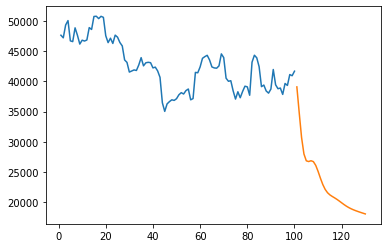

In [47]:
len(df1)
plt.plot(day_new,scaler.inverse_transform(df1[2640:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

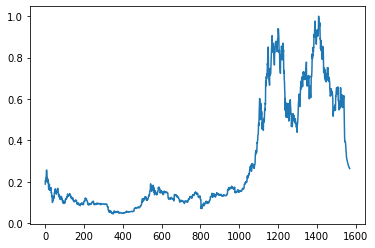

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [49]:
df3=scaler.inverse_transform(df3).tolist()

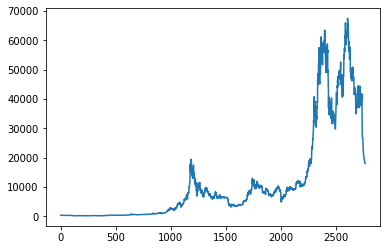

In [50]:
plt.plot(df3)